# 数据加载

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import time

In [3]:
train = pd.read_csv('./train.csv',dtype={'StateHoliday':np.string_}) # 加载数据时，为特定字段指定了数据类型
test = pd.read_csv('./test.csv',dtype={'StateHoliday':np.string_})
store = pd.read_csv('./store.csv') # 每个店铺的详情
display(train.head(),test.head(),store.head())

print(train.shape,test.shape,store.shape)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


(1017209, 9) (41088, 8) (1115, 10)


# 空数据处理

## 训练数据

In [4]:
train.isnull().sum() # 表明train这个数据中没有空数据

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## 测试数据

In [5]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [6]:
cond = test['Open'].isnull()
test[cond]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [8]:
cond = train['Store'] == 622
df = train[cond]
df.sort_values(by = 'Date').iloc[-10:] # 根据过往的数据，对测试数据中622号店铺进行填充
# 原来大部分情况，622都是营业！

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
10656,622,3,2015-07-22,3721,376,1,0,0,1
9541,622,4,2015-07-23,3970,399,1,0,0,1
8426,622,5,2015-07-24,4183,440,1,0,0,1
7311,622,6,2015-07-25,2644,257,1,0,0,0
6196,622,7,2015-07-26,0,0,0,0,0,0
5081,622,1,2015-07-27,5413,517,1,1,0,1
3966,622,2,2015-07-28,4966,417,1,1,0,1
2851,622,3,2015-07-29,5326,468,1,1,0,1
1736,622,4,2015-07-30,5412,406,1,1,0,1
621,622,5,2015-07-31,6306,540,1,1,0,1


In [9]:
test.fillna(1,inplace=True) # 填充空数据
test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## 商店数据处理

In [10]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
v1 = 'CompetitionDistance'
v2 = 'CompetitionOpenSinceMonth'
v3 = 'CompetitionOpenSinceYear'
v4 = 'Promo2SinceWeek'
v5 = 'Promo2SinceYear'
v6 = 'PromoInterval'

In [12]:
# v2和v3 同时缺失
store[(store[v2].isnull()) & (store[v3].isnull())].shape

(354, 10)

In [13]:
# v4、v5、v6同时缺失
store[(store[v4].isnull())&(store[v5].isnull())&(store[v6].isnull())].shape

(544, 10)

In [14]:
store.fillna(0,inplace=True) # 填充成，解释含义：刚开业
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## 销售时间关系

In [15]:
cond = train['Sales'] > 0
sales_data = train[cond] # 获取销售额为正的数据

<AxesSubplot:title={'center':'Store_1'}, xlabel='Date'>

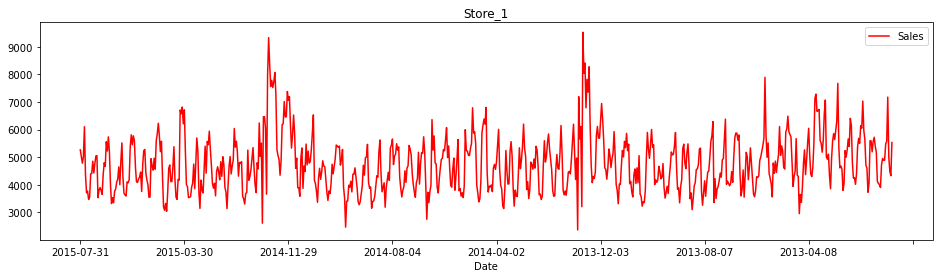

In [16]:
sales_data.loc[train['Store'] == 1].plot(x = 'Date',y = 'Sales',title = 'Store_1',
                                         figsize = (16,4),color = 'red')

In [17]:
test['Date'].unique() # 测试数据，要预测8~9月份的销售情况

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

从图中可以看出店铺的销售额是有周期性变化的，一年中11,12月份销量相对较高，可能是季节（圣诞
节）因素或者促销等原因。
此外从2014年6-9月份的销量来看，6,7月份的销售趋势与8,9月份类似，而我们需要预测的6周在2015年
8,9月份，因此我们可以把2015年6,7月份最近6周的1115家店的数据留出作为测试数据，用于模型的优化与验证。

# 合并数据

In [18]:
display(train.shape,test.shape)
cond = train['Sales'] > 0
train = train[cond] # 过滤了销售额小于0的数据

train = pd.merge(train,store,on = 'Store',how = 'left')
test = pd.merge(test,store,on = 'Store',how = 'left')
display(train.shape,test.shape)

(1017209, 9)

(41088, 8)

(844338, 18)

(41088, 17)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        844338 non-null  float64
 12  CompetitionOpenSinceMonth  844338 non-null  float64
 13  CompetitionOpenSinceYear   84

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

# 特征工程

In [21]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [22]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [23]:
%%time
for data in [train,test]:
    # 修改时间
    data['year'] = data['Date'].apply(lambda x : x.split('-')[0]).astype(int)
    data['month'] = data['Date'].apply(lambda x : x.split('-')[1]).astype(int)
    data['day'] = data['Date'].apply(lambda x : x.split('-')[2]).astype(int)
    
    # 店铺有一个字段：PromoInterval，string类型，无法进行建模
    # IsPromoMonth 是否进行了促销
    month2str = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                 10:'Oct',11:'Nov',12:'Dec'}
    data['monthstr'] = data['month'].map(month2str)
    
    # convert是转换函数
    convert = lambda x : 0 if x['PromoInterval'] == 0 else 1 if x['monthstr'] in x['PromoInterval'] else 0
    
    # 这个月是否为促销月
    data['IsPromoMonth'] = data.apply(convert,axis = 1)
    
    # 将存在字符串类型转换成数字：StoreType、Assortment、StateHoliday
    mappings = {'0':0,'a':1,'b':2,'c':3,'d':4}
    data['StoreType'].replace(mappings,inplace = True)
    data['Assortment'].replace(mappings,inplace = True)
    data['StateHoliday'].replace(mappings,inplace = True)

CPU times: user 7.44 s, sys: 169 ms, total: 7.61 s
Wall time: 7.62 s


In [24]:
train['StoreType'].unique()

array([3, 1, 4, 2])

In [25]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,monthstr,IsPromoMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,31,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,...,2009.0,0,0.0,0.0,0,2015,7,31,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,2015.0,0,0.0,0.0,0,2015,7,31,Jul,0


# 构建训练数据和测试数据

In [26]:
display(train.head(),test.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,monthstr,IsPromoMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,2008.0,0,0.0,0.0,0,2015,7,31,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,...,2009.0,0,0.0,0.0,0,2015,7,31,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,2015.0,0,0.0,0.0,0,2015,7,31,Jul,0


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,monthstr,IsPromoMonth
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,...,2008.0,0,0.0,0.0,0,2015,9,17,Sep,0
1,2,3,4,2015-09-17,1.0,1,0,0,1,1,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,Sep,0
2,3,7,4,2015-09-17,1.0,1,0,0,1,3,...,2013.0,0,0.0,0.0,0,2015,9,17,Sep,0
3,4,8,4,2015-09-17,1.0,1,0,0,1,1,...,2014.0,0,0.0,0.0,0,2015,9,17,Sep,0
4,5,9,4,2015-09-17,1.0,1,0,0,1,3,...,2000.0,0,0.0,0.0,0,2015,9,17,Sep,0


In [27]:
display(train.shape,test.shape)
df_train = train.drop(['Date','monthstr','PromoInterval','Customers','Open'],axis = 1)
df_test = test.drop(['Date','monthstr','PromoInterval','Open','Id'],axis = 1)
display(df_train.shape,df_test.shape)

(844338, 23)

(41088, 22)

(844338, 18)

(41088, 17)

In [28]:
train[:6*7*1115]['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13'], dtype=object)

In [30]:
train[:8*7*1115]['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [31]:
# df_train训练数据，历史数据
# 根据历史数据，进行建模，对df_test进行预测
# df_train这个数据，进行拆分：建模训练数据、验证数据（评估）

X_train = df_train[6*7*1115:] # 建模训练数据
X_test = df_train[:6*7*1115] # 建模验证数据（评估） 2015年 6~7月份的销售数据

# 数据属性间的相关性系数

<AxesSubplot:>

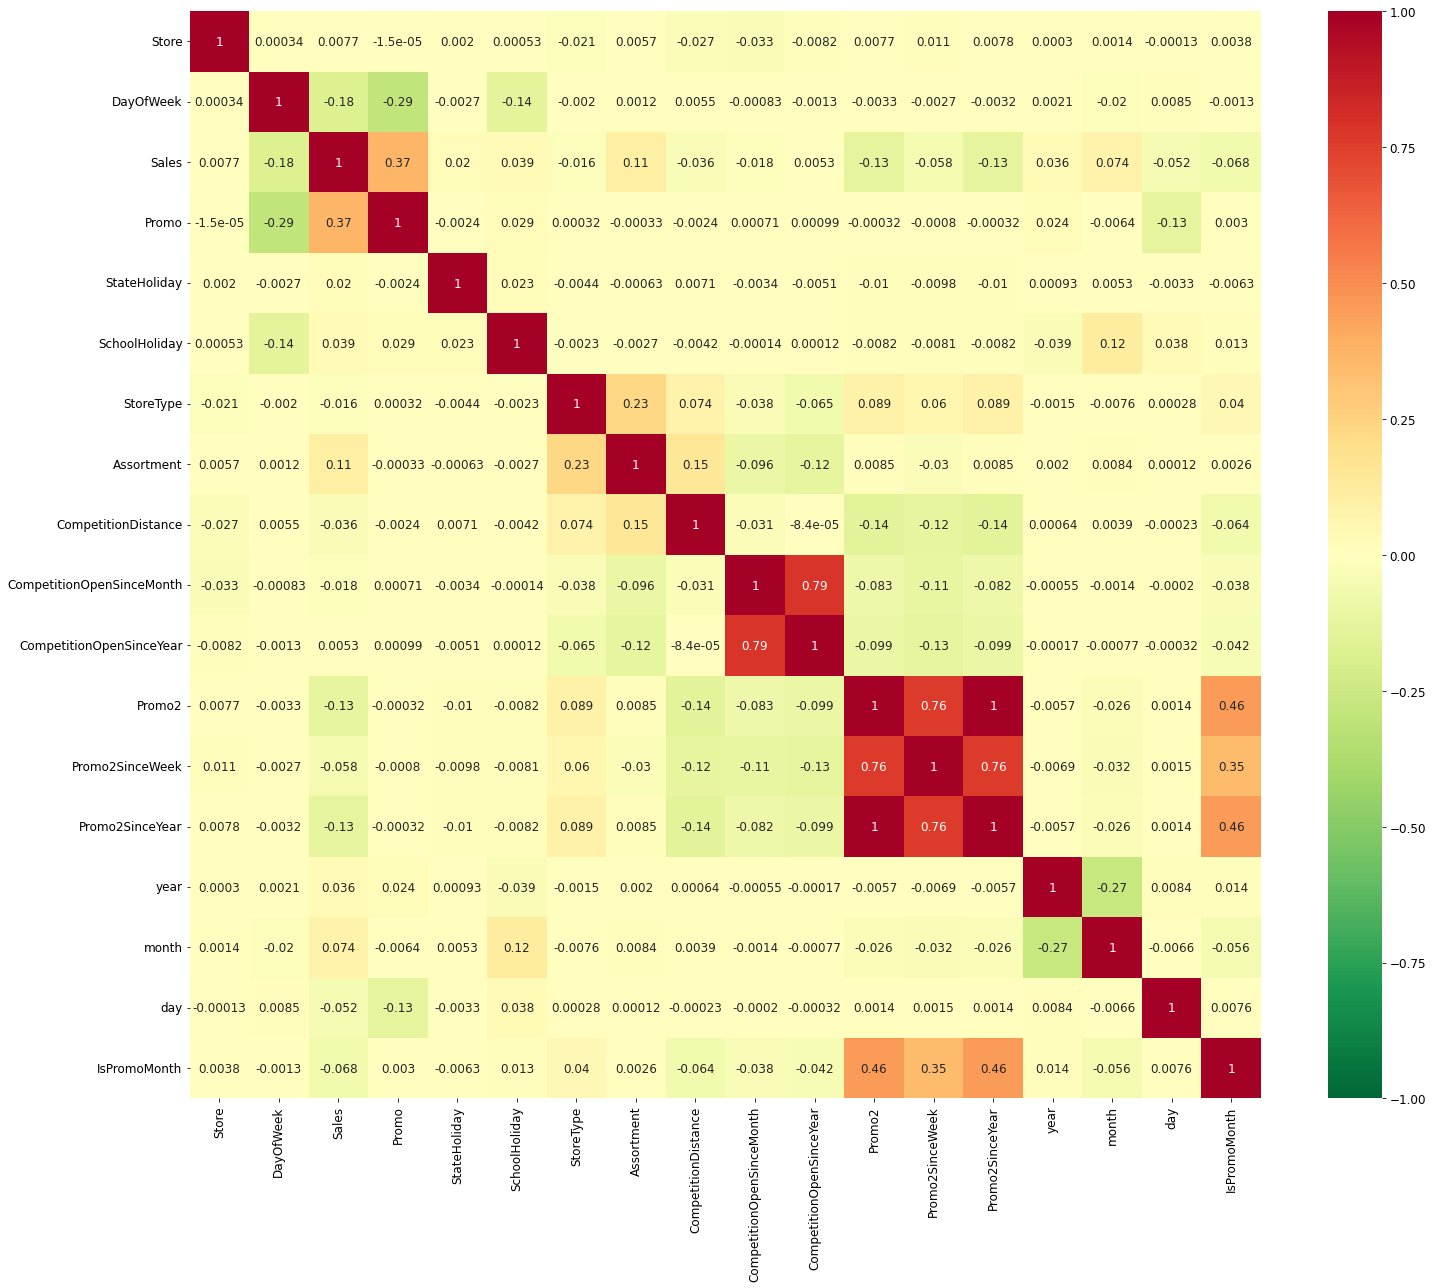

In [32]:
plt.figure(figsize=(24,20))

plt.rcParams['font.size'] = 12

sns.heatmap(df_train.corr(),cmap = 'RdYlGn_r',annot=True,vmin = -1,vmax=1)

# 提取模型训练的数据

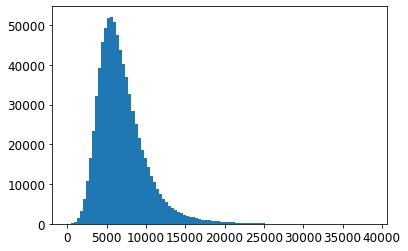

In [33]:
_ = plt.hist(X_train['Sales'],bins = 100) # 目标值，销售额，正态分布，不够正！！！

In [34]:
# 目标值
y_train = np.log1p(X_train['Sales']) # 对数化
y_test = np.log1p(X_test['Sales']) # 对数化，正态化，更加规整,正态化

# 特征
X_train = X_train.drop('Sales',axis = 1) # X_train,y_train 数据--->目标值（建模）
X_test = X_test.drop('Sales',axis = 1) # X_test，y_test 数据 --->目标值（验证，评估）

In [35]:
np.log(10)

2.302585092994046

In [36]:
np.log1p(9)

2.302585092994046

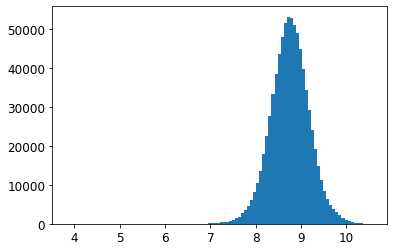

In [37]:
_ = plt.hist(y_train,bins = 100) # 目标值，销售额，正态分布

# 构建模型

## 定义评价函数(均方根百分比误差)

<font size = 5 color = 'green'>$RMSPE = \sqrt{\frac{1}{N}\sum\limits_{i=1}^N(1-\frac{\hat{y}}{y})^2}$</font>

In [39]:
def rmspe(y,yhat):
    return np.sqrt(np.mean(1 - yhat/y)**2)

In [40]:
def rmspe_xg(y,yhat): # 放大镜
    y = np.expm1(y) 
    yhat = np.expm1(yhat.get_label())# DMaxtrix数据类型，get_label获取数据
    return 'rmspe',rmspe(y,yhat)

In [41]:
np.expm1(2)

6.38905609893065

In [42]:
np.exp(2) -1 

6.38905609893065

## 模型训练

In [43]:
%%time
params = {'objective':'reg:linear',
          'booster':'gbtree',
          'eta':0.03,
          'max_depth':10,
          'subsample':0.9,
          'colsample_bytree':0.7,
          'silent':1,
          'seed':10}

num_boost_round = 6000

dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test) # 保留的验证数据

print('模型训练开始……')

evals = [(dtrain,'train'),(dtest,'validation')]

gbm = xgb.train(params,# 模型参数
          dtrain, # 训练数据
          num_boost_round, # 轮次，决策树的个数
          evals = evals,# 验证，评估的数据
          early_stopping_rounds=100, # 在验证集上，当连续n次迭代，分数没有提高后，提前终止训练
          feval=rmspe_xg,# 模型评估的函数
          verbose_eval=True)# 打印输出log日志，每次训练详情

模型训练开始……
[18:04:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/anaconda3/lib/python3.9/site-packages/xgboost/training.py:35: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	train-rmse:8.01963	train-rmspe:6230.14990	validation-rmse:8.04835	validation-rmspe:6389.62988
[1]	train-rmse:7.77952	train-rmspe:4099.54590	validation-rmse:7.80812	validation-rmspe:4203.94971
[2]	train-rmse:7.54664	train-rmspe:2886.26587	validation-rmse:7.57534	validation-rmspe:2960.11475
[3]	train-rmse:7.32074	train-rmspe:2119.10596	validation-rmse:7.34938	validation-rmspe:2173.20752
[4]	train-rmse:7.10161	train-rmspe:1601.73682	validation-rmse:7.12995	validation-rmspe:1642.05420
[5]	train-rmse:6.88914	train-rmspe:1238.32751	validation-rmse:6.91729	validation-rmspe:1269.35584
[6]	train-rmse:6.68297	train-rmspe:972.97821	validation-rmse:6.71100	validation-rmspe:997.33624
[7]	train-rmse:6.48301	train-rmspe:775.21509	validation-rmse:6.51066	validation-rmspe:794.29376
[8]	train-rmse:6.28905	train-rmspe:624.86865	validation-rmse:6.31626	validation-rmspe:639.95154
[9]	train-rmse:6.10094	train-rmspe:508.87351	validation-rmse:6.12810	validation-rmspe:521.16620
[10]	train-rmse:5.91848	trai

[87]	train-rmse:0.62330	train-rmspe:0.82219	validation-rmse:0.62973	validation-rmspe:0.83471
[88]	train-rmse:0.60771	train-rmspe:0.79129	validation-rmse:0.61406	validation-rmspe:0.80339
[89]	train-rmse:0.59250	train-rmspe:0.76165	validation-rmse:0.59883	validation-rmspe:0.77351
[90]	train-rmse:0.57775	train-rmspe:0.73330	validation-rmse:0.58410	validation-rmspe:0.74500
[91]	train-rmse:0.56334	train-rmspe:0.70608	validation-rmse:0.56951	validation-rmspe:0.71722
[92]	train-rmse:0.54951	train-rmspe:0.68017	validation-rmse:0.55565	validation-rmspe:0.69109
[93]	train-rmse:0.53640	train-rmspe:0.65563	validation-rmse:0.54253	validation-rmspe:0.66627
[94]	train-rmse:0.52355	train-rmspe:0.63197	validation-rmse:0.52968	validation-rmspe:0.64236
[95]	train-rmse:0.51116	train-rmspe:0.60937	validation-rmse:0.51733	validation-rmspe:0.61968
[96]	train-rmse:0.49939	train-rmspe:0.58789	validation-rmse:0.50567	validation-rmspe:0.59822
[97]	train-rmse:0.48786	train-rmspe:0.56719	validation-rmse:0.49417	va

[175]	train-rmse:0.21362	train-rmspe:0.06258	validation-rmse:0.22274	validation-rmspe:0.05964
[176]	train-rmse:0.21308	train-rmspe:0.06127	validation-rmse:0.22225	validation-rmspe:0.05826
[177]	train-rmse:0.21279	train-rmspe:0.06005	validation-rmse:0.22199	validation-rmspe:0.05705
[178]	train-rmse:0.21228	train-rmspe:0.05882	validation-rmse:0.22153	validation-rmspe:0.05582
[179]	train-rmse:0.21147	train-rmspe:0.05755	validation-rmse:0.22081	validation-rmspe:0.05459
[180]	train-rmse:0.21079	train-rmspe:0.05634	validation-rmse:0.22023	validation-rmspe:0.05340
[181]	train-rmse:0.20911	train-rmspe:0.05494	validation-rmse:0.21866	validation-rmspe:0.05200
[182]	train-rmse:0.20850	train-rmspe:0.05382	validation-rmse:0.21810	validation-rmspe:0.05080
[183]	train-rmse:0.20783	train-rmspe:0.05271	validation-rmse:0.21751	validation-rmspe:0.04970
[184]	train-rmse:0.20761	train-rmspe:0.05172	validation-rmse:0.21735	validation-rmspe:0.04874
[185]	train-rmse:0.20742	train-rmspe:0.05078	validation-rmse

[263]	train-rmse:0.16846	train-rmspe:0.01676	validation-rmse:0.18211	validation-rmspe:0.01177
[264]	train-rmse:0.16822	train-rmspe:0.01665	validation-rmse:0.18189	validation-rmspe:0.01166
[265]	train-rmse:0.16782	train-rmspe:0.01650	validation-rmse:0.18156	validation-rmspe:0.01152
[266]	train-rmse:0.16763	train-rmspe:0.01639	validation-rmse:0.18141	validation-rmspe:0.01130
[267]	train-rmse:0.16746	train-rmspe:0.01629	validation-rmse:0.18131	validation-rmspe:0.01111
[268]	train-rmse:0.16729	train-rmspe:0.01619	validation-rmse:0.18120	validation-rmspe:0.01104
[269]	train-rmse:0.16701	train-rmspe:0.01607	validation-rmse:0.18094	validation-rmspe:0.01092
[270]	train-rmse:0.16664	train-rmspe:0.01594	validation-rmse:0.18052	validation-rmspe:0.01070
[271]	train-rmse:0.16638	train-rmspe:0.01584	validation-rmse:0.18029	validation-rmspe:0.01057
[272]	train-rmse:0.16626	train-rmspe:0.01575	validation-rmse:0.18021	validation-rmspe:0.01044
[273]	train-rmse:0.16566	train-rmspe:0.01559	validation-rmse

[351]	train-rmse:0.14552	train-rmspe:0.01066	validation-rmse:0.16223	validation-rmspe:0.00462
[352]	train-rmse:0.14514	train-rmspe:0.01060	validation-rmse:0.16189	validation-rmspe:0.00454
[353]	train-rmse:0.14507	train-rmspe:0.01059	validation-rmse:0.16183	validation-rmspe:0.00453
[354]	train-rmse:0.14484	train-rmspe:0.01055	validation-rmse:0.16161	validation-rmspe:0.00447
[355]	train-rmse:0.14459	train-rmspe:0.01051	validation-rmse:0.16140	validation-rmspe:0.00444
[356]	train-rmse:0.14445	train-rmspe:0.01048	validation-rmse:0.16127	validation-rmspe:0.00441
[357]	train-rmse:0.14433	train-rmspe:0.01046	validation-rmse:0.16116	validation-rmspe:0.00438
[358]	train-rmse:0.14387	train-rmspe:0.01039	validation-rmse:0.16070	validation-rmspe:0.00428
[359]	train-rmse:0.14356	train-rmspe:0.01034	validation-rmse:0.16044	validation-rmspe:0.00421
[360]	train-rmse:0.14319	train-rmspe:0.01028	validation-rmse:0.16011	validation-rmspe:0.00414
[361]	train-rmse:0.14313	train-rmspe:0.01027	validation-rmse

[439]	train-rmse:0.12995	train-rmspe:0.00835	validation-rmse:0.14932	validation-rmspe:0.00084
[440]	train-rmse:0.12985	train-rmspe:0.00834	validation-rmse:0.14923	validation-rmspe:0.00078
[441]	train-rmse:0.12975	train-rmspe:0.00833	validation-rmse:0.14916	validation-rmspe:0.00077
[442]	train-rmse:0.12957	train-rmspe:0.00830	validation-rmse:0.14901	validation-rmspe:0.00074
[443]	train-rmse:0.12931	train-rmspe:0.00827	validation-rmse:0.14878	validation-rmspe:0.00069
[444]	train-rmse:0.12926	train-rmspe:0.00826	validation-rmse:0.14874	validation-rmspe:0.00075
[445]	train-rmse:0.12913	train-rmspe:0.00824	validation-rmse:0.14863	validation-rmspe:0.00072
[446]	train-rmse:0.12894	train-rmspe:0.00822	validation-rmse:0.14847	validation-rmspe:0.00069
[447]	train-rmse:0.12888	train-rmspe:0.00821	validation-rmse:0.14841	validation-rmspe:0.00066
[448]	train-rmse:0.12883	train-rmspe:0.00820	validation-rmse:0.14837	validation-rmspe:0.00065
[449]	train-rmse:0.12852	train-rmspe:0.00816	validation-rmse

[527]	train-rmse:0.12025	train-rmspe:0.00713	validation-rmse:0.14125	validation-rmspe:0.00098
[528]	train-rmse:0.12006	train-rmspe:0.00711	validation-rmse:0.14109	validation-rmspe:0.00099
[529]	train-rmse:0.11992	train-rmspe:0.00709	validation-rmse:0.14096	validation-rmspe:0.00106
[530]	train-rmse:0.11980	train-rmspe:0.00708	validation-rmse:0.14086	validation-rmspe:0.00108
[531]	train-rmse:0.11968	train-rmspe:0.00706	validation-rmse:0.14077	validation-rmspe:0.00109
[532]	train-rmse:0.11956	train-rmspe:0.00705	validation-rmse:0.14069	validation-rmspe:0.00105
[533]	train-rmse:0.11951	train-rmspe:0.00704	validation-rmse:0.14064	validation-rmspe:0.00107
[534]	train-rmse:0.11944	train-rmspe:0.00703	validation-rmse:0.14057	validation-rmspe:0.00111
[535]	train-rmse:0.11930	train-rmspe:0.00701	validation-rmse:0.14045	validation-rmspe:0.00112
[536]	train-rmse:0.11916	train-rmspe:0.00700	validation-rmse:0.14034	validation-rmspe:0.00113
[537]	train-rmse:0.11902	train-rmspe:0.00698	validation-rmse

## 模型保存

In [ ]:
# gbm.save_model('./train_model.json')

## 模型评估

In [44]:
print('验证数据表现：') # X_test就是验证数据
X_test.sort_index(inplace=True)
y_test.sort_index(inplace=True)

# 使用算法进行了预测
yhat = gbm.predict(xgb.DMatrix(X_test))

error = rmspe(np.expm1(y_test),np.expm1(yhat))
print('RMSPE：',error)

验证数据表现：
RMSPE： 0.02076607222713522


In [45]:
# 画图查看，模型评估结果
res = pd.DataFrame(data = y_test) # 真实
res['Prediction'] = yhat # 预测

res = pd.merge(X_test,res,left_index=True,right_index=True)

res['Ratio'] = res['Prediction']/res['Sales'] # 预测和真实销量的比率
res['Error'] = abs(1 - res['Ratio']) # 误差率
res['weight'] = res['Sales']/res['Prediction'] # 真实销量占预测值的百分比
display(res.head())

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceYear,year,month,day,IsPromoMonth,Sales,Prediction,Ratio,Error,weight
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,...,0.0,2015,7,31,0,8.568646,8.698814,1.015191,0.015191,0.985036
1,2,5,1,0,1,1,1,570.0,11.0,2007.0,...,2010.0,2015,7,31,1,8.710290,8.779842,1.007985,0.007985,0.992078
2,3,5,1,0,1,1,1,14130.0,12.0,2006.0,...,2011.0,2015,7,31,1,9.025816,9.115033,1.009885,0.009885,0.990212
3,4,5,1,0,1,3,3,620.0,9.0,2009.0,...,0.0,2015,7,31,0,9.546527,9.404050,0.985076,0.014924,1.015151
4,5,5,1,0,1,1,1,29910.0,4.0,2015.0,...,0.0,2015,7,31,0,8.481151,8.775042,1.034652,0.034652,0.966508


In [46]:
from matplotlib import font_manager
fm = font_manager.FontManager()
for font in fm.ttflist:
    print(font.name)

cmb10
cmr10
DejaVu Serif Display
STIXSizeOneSym
cmss10
DejaVu Sans
STIXNonUnicode
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans
DejaVu Sans Mono
STIXSizeTwoSym
STIXSizeThreeSym
DejaVu Serif
DejaVu Serif
DejaVu Sans
cmmi10
STIXNonUnicode
STIXGeneral
STIXSizeFiveSym
STIXSizeOneSym
DejaVu Sans Display
STIXSizeFourSym
STIXSizeThreeSym
cmsy10
DejaVu Serif
STIXSizeFourSym
STIXGeneral
STIXNonUnicode
STIXGeneral
DejaVu Serif
cmex10
STIXSizeTwoSym
DejaVu Sans
STIXGeneral
DejaVu Sans Mono
cmtt10
STIXNonUnicode
Comic Sans MS
Party LET
Academy Engraved LET
System Font
Noto Sans Javanese
STIXSizeFourSym
Georgia
Noto Sans Tai Tham
Beirut
Noto Sans Batak
Noto Sans Lydian
Noto Sans Cypriot
Noto Nastaliq Urdu
Apple Braille
Noto Sans Old Hungarian
Noto Sans Syloti Nagri
Mukta Mahee
STIXSizeOneSym
Arial Unicode MS
Papyrus
Noto Sans Armenian
Apple Braille
Arial Hebrew
Noto Sans Mende Kikakui
PT Serif
Noto Sans Osage
Noto Sans Kaithi
Sathu
Al Tarikh
Apple Chancery
Heiti TC
Trebuchet MS
Avenir Next Condense

全部商店预测值和真实销量的比率是1.002


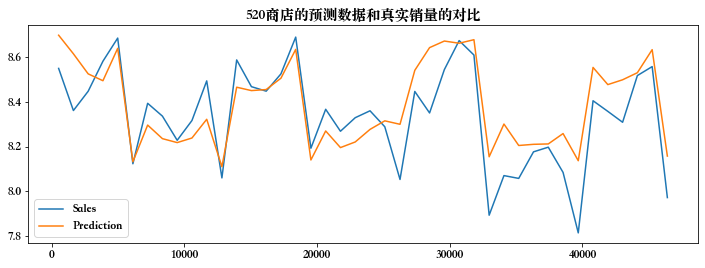

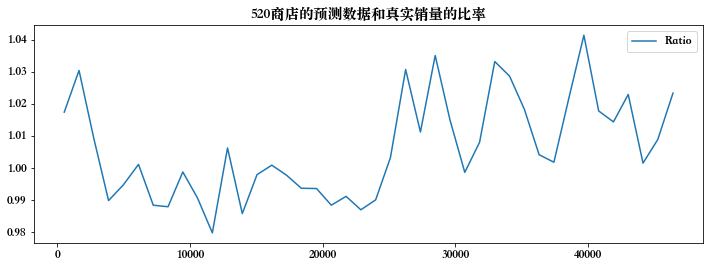

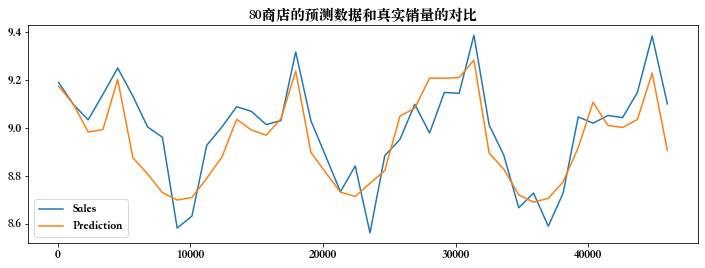

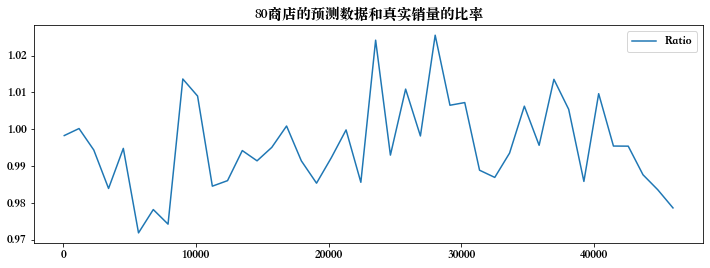

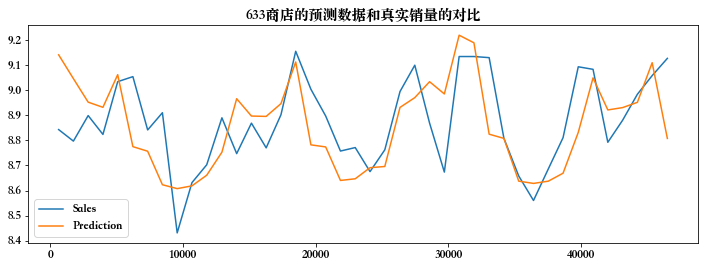

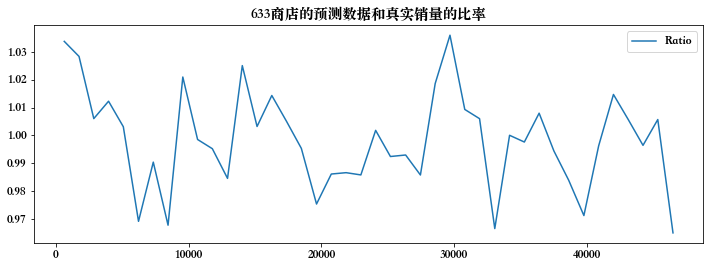

In [47]:
plt.rcParams['font.family'] = 'Songti SC'

col_1 = ['Sales','Prediction']
col_2 = ['Ratio']

# 随机选择三个店铺，进行可视化
shops = np.random.randint(1,1116,size = 3)

print('全部商店预测值和真实销量的比率是%0.3f' %(res['Ratio'].mean()))

for shop in shops:
    cond = res['Store'] == shop
    df1 = pd.DataFrame(data = res[cond],columns = col_1)
    df2 = pd.DataFrame(data = res[cond],columns = col_2)
    df1.plot(title = '%d商店的预测数据和真实销量的对比' % (shop),figsize = (12,4))
    df2.plot(title = '%d商店的预测数据和真实销量的比率' % (shop),figsize = (12,4))

In [48]:
# 偏差数据
res.sort_values(by = ['Error'],ascending=False)

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceYear,year,month,day,IsPromoMonth,Sales,Prediction,Ratio,Error,weight
20419,292,5,0,0,0,1,1,1100.0,6.0,2009.0,...,0.0,2015,7,10,0,6.920672,8.590510,1.241283,2.412828e-01,0.805618
34346,782,5,0,0,0,3,3,5390.0,8.0,2003.0,...,2012.0,2015,6,26,0,7.260523,8.558833,1.178818,1.788178e-01,0.848308
29981,909,3,1,0,0,1,3,1680.0,0.0,0.0,...,2009.0,2015,7,1,0,8.174139,9.468882,1.158395,1.583949e-01,0.863263
38929,909,1,0,0,0,1,3,1680.0,0.0,0.0,...,2009.0,2015,6,22,0,10.634701,9.085303,0.854307,1.456926e-01,1.170539
26022,292,6,0,0,0,1,1,1100.0,6.0,2009.0,...,0.0,2015,7,4,0,7.406711,8.452643,1.141214,1.412142e-01,0.876260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,49,4,1,0,1,4,3,18010.0,9.0,2007.0,...,0.0,2015,7,30,0,9.104646,9.104661,1.000002,1.594838e-06,0.999998
5601,5,6,0,0,0,1,1,29910.0,4.0,2015.0,...,0.0,2015,7,25,0,7.616284,7.616275,0.999999,1.145953e-06,1.000001
8214,393,4,0,0,1,4,3,4820.0,3.0,2008.0,...,0.0,2015,7,23,0,8.492491,8.492496,1.000001,6.961094e-07,0.999999
18159,290,1,1,0,1,1,1,4150.0,5.0,2001.0,...,0.0,2015,7,13,0,9.206734,9.206731,1.000000,3.295188e-07,1.000000


## 模型优化

### 整体模型优化

最佳的偏差校正权重： 8 0.005786011512281074 0.998


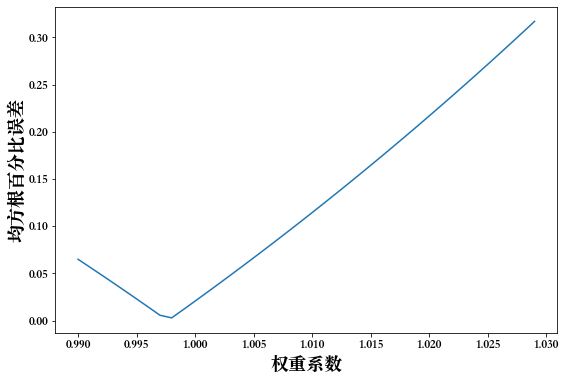

In [49]:
weights = [(0.99 + (i/1000)) for i in range(40)]

errors = []

for w in weights:
    # 偏差校正
    error = rmspe(np.expm1(y_test),np.expm1(yhat * w)) # 这就是对预测值，进行权重乘法，微小改变
    errors.append(error)
    
errors = pd.Series(errors,index=weights)

plt.figure(figsize=(9,6))
errors.plot()

plt.xlabel('权重系数',fontsize = 18)
plt.ylabel('均方根百分比误差',fontsize = 18)

index = errors.argmin()
print('最佳的偏差校正权重：',index,errors.iloc[7],weights[index])

### 更加细致的优化（考虑不同店铺）

In [50]:
y_test.shape

(46830,)

In [51]:
df_test.shape

(41088, 17)

In [52]:
shops = np.arange(1,1116)
weights1 = [] # 验证数据每个店铺的权重系数 46830
weights2 = [] # 测试数据每个店铺的权重系数 41088，提交到Kaggle官网

for shop in shops:
    cond = res['Store'] == shop
    df1 = pd.DataFrame(res[cond], columns=col_1) # 验证数据的预测数据和真实销量
    
    cond2 = df_test['Store'] == shop
    df2 = pd.DataFrame(df_test[cond2])
    weights = [(0.98 + (i/1000)) for i in range(40)]
    errors = []
    for w in weights:
        error = rmspe(np.expm1(df1['Sales']),np.expm1(df1['Prediction'] * w))
        errors.append(error)
    errors = pd.Series(errors,index = weights)
    index = errors.argmin() # 最小的索引
    
    best_weight = np.array(weights[index]) # 只是一个数值
    
    weights1.extend(best_weight.repeat(len(df1)).tolist())
    weights2.extend(best_weight.repeat(len(df2)).tolist())
    
# for循环结束，每个店铺的权重，是多少，计算得到了
# 验证数据调整校正系数的排序
X_test = X_test.sort_values(by = 'Store') # 1,2,3,……1115
X_test['weights1'] = weights1 # 权重和店铺，进行一一对应！
X_test = X_test.sort_index() # 根据索引大小进行排序
weights1 = X_test['weights1']
X_test = X_test.drop('weights1',axis = 1)


# 测试数据调整校正系数
df_test = df_test.sort_values(by = 'Store') # 1,2,3,……1115
df_test['weights2'] = weights2 # 权重和店铺，进行一一对应！
df_test = df_test.sort_index() # 根据索引大小进行排序
weights2 = df_test['weights2']
df_test = df_test.drop('weights2',axis = 1)

In [53]:
yhat_new = yhat * weights1 # 预测销售额，校正

rmspe(np.expm1(y_test),np.expm1(yhat_new))

0.00043480184686555204

# 模型的预测

In [54]:
# 使用算法，对测试数据，进行预测
test = xgb.DMatrix(df_test)

y_pred = gbm.predict(test) # 算法预测的结果，结果提交Kaggle
# y_pred 是对数运算的结果
# 真实数据，数据转换，幂运算

In [55]:
num = np.log1p(10)
num

2.3978952727983707

In [ ]:
# 保存数据，不经任何调整校正
result = pd.DataFrame({'ID':np.arange(1,41089),'Sales':np.expm1(y_pred)})

result.to_csv('./result_1.csv',index=False)

In [ ]:
# 对整体模型进行优化
w = 0.997
result = pd.DataFrame({'ID':np.arange(1,41089),'Sales':np.expm1(y_pred * w)})

result.to_csv('./result_2.csv',index=False)

In [ ]:
# 进行更加细致的模型优化

weights2

# 每个店铺的，权重校正，都不同，细致！！！
result = pd.DataFrame({'ID':np.arange(1,41089),'Sales':np.expm1(y_pred * weights2)})

result.to_csv('./result_3.csv',index=False)